In [1]:
import sys
sys.path.append('../core/')
sys.path.append('../networks/')
from draw import DRAW
from networks import *

import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

/Users/jucheng/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
tf.reset_default_graph()

In [3]:
sess = tf.InteractiveSession()
build_encoder = Encoder(256)
build_decoder = Decoder(256)
train_iters = 10000

In [4]:
model =  DRAW(sess, build_encoder, build_decoder, read_attn = True, write_attn = True, train_iters = train_iters)

In [5]:
model.train()

Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz
iter=0 : Lx: 543.897461 Lz: 0.868806
iter=100 : Lx: 205.606323 Lz: 2.017102
iter=200 : Lx: 195.010101 Lz: 2.318509
iter=300 : Lx: 195.006363 Lz: 3.240939
iter=400 : Lx: 183.170013 Lz: 4.656350
iter=500 : Lx: 175.655914 Lz: 8.004321
iter=600 : Lx: 162.013611 Lz: 9.084793
iter=700 : Lx: 159.270020 Lz: 9.099060
iter=800 : Lx: 148.601639 Lz: 10.700823
iter=900 : Lx: 150.115952 Lz: 11.278037
iter=1000 : Lx: 144.558960 Lz: 11.502959
iter=1100 : Lx: 145.890686 Lz: 12.420161
iter=1200 : Lx: 135.225861 Lz: 13.549826
iter=1300 : Lx: 139.317673 Lz: 13.480132
iter=1400 : Lx: 128.468613 Lz: 15.034951
iter=1500 : Lx: 121.061897 Lz: 15.113586
iter=1600 : Lx: 125.429977 Lz: 16.568567
iter=1700 : Lx: 122.063538 Lz: 17.200310
iter=1800 : Lx: 114.741188 Lz: 17.188457
iter=1900 : Lx: 107.445038 Lz: 16.843016
iter=2000 : Lx: 108.061447

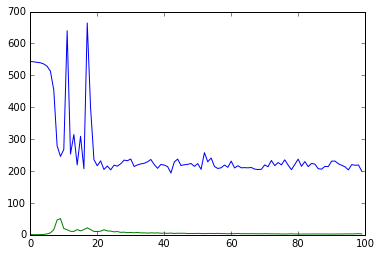

In [179]:
plt.plot(range(train_iters), model.Lxs, range(train_iters), model.Lzs)

In [166]:
generated_images = model.inference()

In [167]:
generated_images.shape

(10, 100, 784)

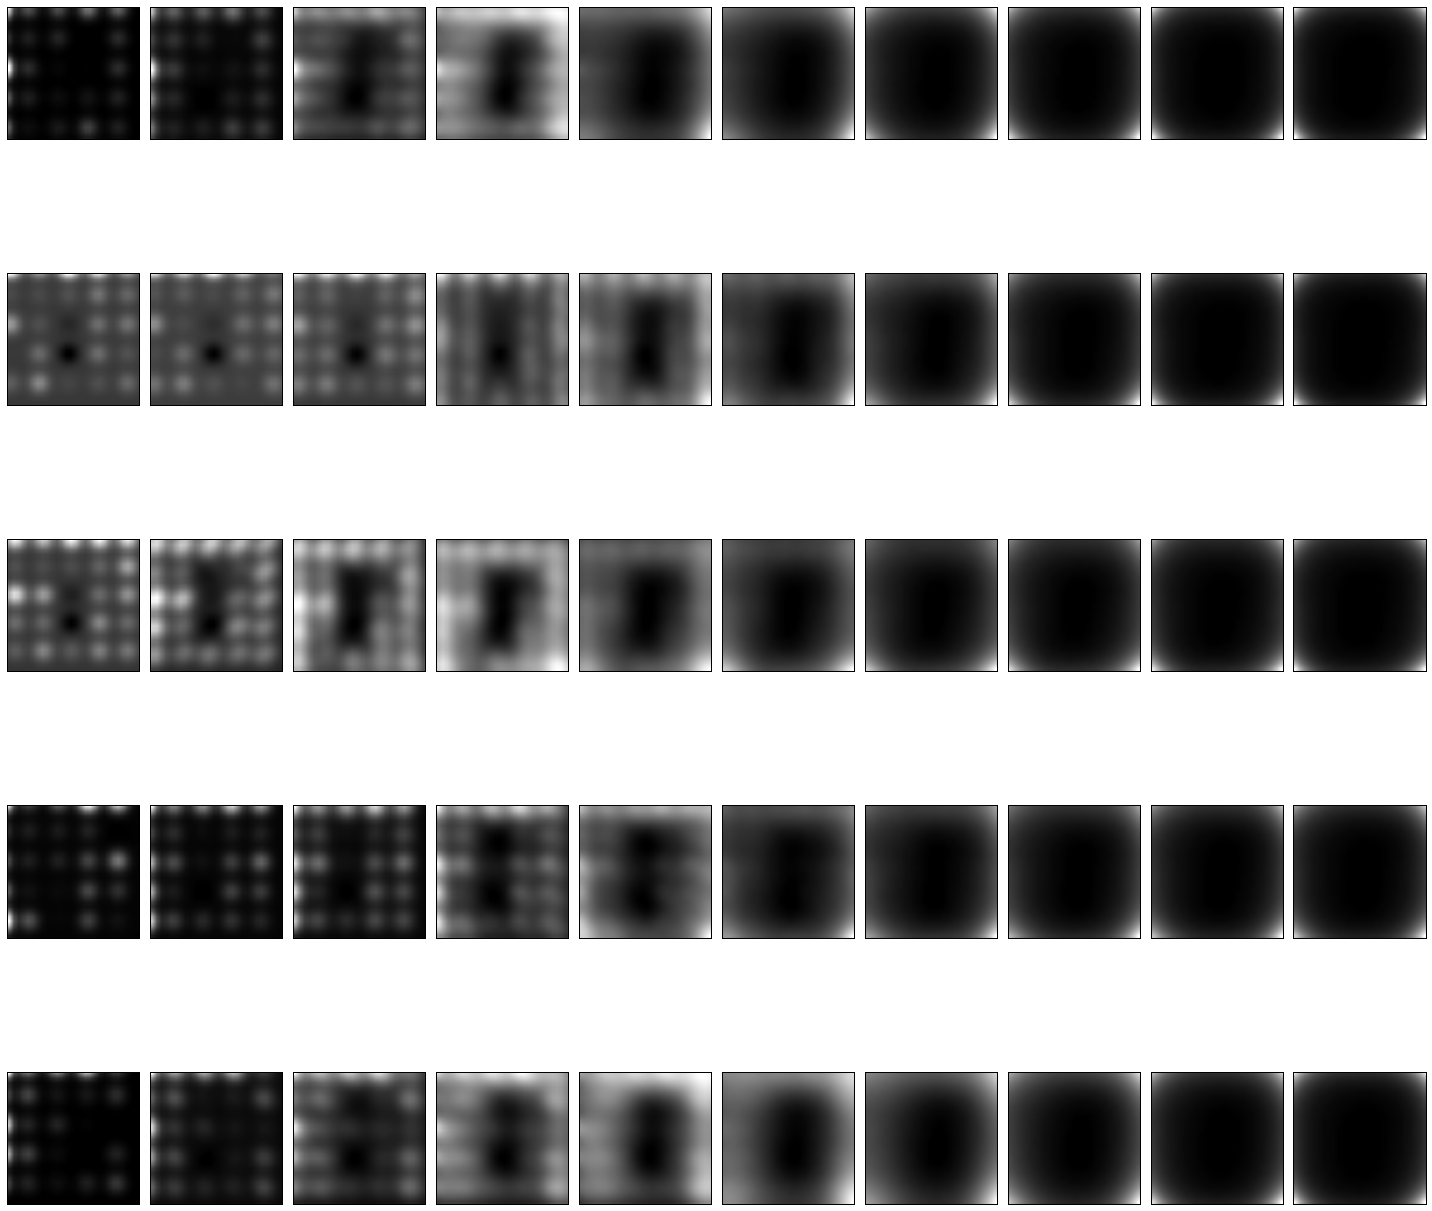

In [168]:
T = 10
num_examples = 5

plt.figure(figsize=(20,20))
for t in xrange(T):
    for n in xrange(num_examples):
        plt.subplot(num_examples, T, T* n + t + 1)
        plt.imshow(generated_images[t,n, ].reshape(28, 28), cmap='gray_r')
        plt.xticks([])
        plt.yticks([])
plt.tight_layout()
plt.show()